In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from jupyterthemes import jtplot


## Data
---

In [2]:
df = pd.read_excel("data.xlsx")
df.head(10).style.background_gradient(cmap="YlOrRd")

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1,1.100000,Ideal,H,SI1,VG,EX,GIA,5169
1,2,0.830000,Ideal,H,VS1,ID,ID,AGSL,3470
2,3,0.850000,Ideal,H,SI1,EX,EX,GIA,3183
3,4,0.910000,Ideal,E,SI1,VG,VG,GIA,4370
4,5,0.830000,Ideal,G,SI1,EX,EX,GIA,3171
5,6,1.530000,Ideal,E,SI1,ID,ID,AGSL,12791
6,7,1.000000,Very Good,D,SI1,VG,G,GIA,5747
7,8,1.500000,Fair,F,SI1,VG,VG,GIA,10450
8,9,2.110000,Ideal,H,SI1,VG,VG,GIA,18609
9,10,1.050000,Very Good,E,VS1,VG,G,GIA,7666


## Cleaning and Feature Engineering
---

In [3]:
df = df.drop_duplicates()

In [4]:
df.isnull().sum()

ID              0
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [5]:
df.dtypes
# From here we see that except than "ID", "Carat Weight", and "Price", all of them are categorial data

ID                int64
Carat Weight    float64
Cut              object
Color            object
Clarity          object
Polish           object
Symmetry         object
Report           object
Price             int64
dtype: object

In [6]:
print(df['Cut'].unique())
print(df['Color'].unique())
print(df['Clarity'].unique())
print(df['Polish'].unique())
print(df['Symmetry'].unique())
print(df['Report'].unique())

['Ideal' 'Very Good' 'Fair' 'Good' 'Signature-Ideal']
['H' 'E' 'G' 'D' 'F' 'I']
['SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'IF' 'FL']
['VG' 'ID' 'EX' 'G']
['EX' 'ID' 'VG' 'G']
['GIA' 'AGSL']


In [7]:
Cut_grades = {'Signature-Ideal': 5, 'Ideal': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
Color_grades = {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1}
Clarity_grades = {'FL': 7, 'IF': 6, 'VVS1': 5, 'VVS2': 4, 'VS1': 3, 'VS2': 2, 'SI1': 1}
Polish_and_Symmetry_grades = {'EX': 4, 'ID': 4, 'VG': 3, 'G': 2}
Report_grades = {'GIA':1, 'AGSL': 1}

df['Cut'] = df['Cut'].map(Cut_grades)
df['Color'] = df['Color'].map(Color_grades)
df['Clarity'] = df['Clarity'].map(Clarity_grades)
df['Polish'] = df['Polish'].map(Polish_and_Symmetry_grades)
df['Symmetry'] = df['Symmetry'].map(Polish_and_Symmetry_grades)
df['Report'] = df['Report'].map(Report_grades) 

In [8]:
df.describe()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
count,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.0,6000.000000
mean,3000.500000,1.334520,3.33700,3.256167,2.369333,3.408167,3.291833,1.0,11791.579333
std,1732.195139,0.475696,0.82029,1.561714,1.370367,0.657246,0.715601,0.0,10184.350051
min,1.000000,0.750000,1.00000,1.000000,1.000000,2.000000,2.000000,1.0,2184.000000
25%,1500.750000,1.000000,3.00000,2.000000,1.000000,3.000000,3.000000,1.0,5150.500000
50%,3000.500000,1.130000,3.00000,3.000000,2.000000,4.000000,3.000000,1.0,7857.000000
75%,4500.250000,1.590000,4.00000,4.000000,3.000000,4.000000,4.000000,1.0,15036.500000
max,6000.000000,2.910000,5.00000,6.000000,7.000000,4.000000,4.000000,1.0,101561.000000


Descriptive statistic:
1. mean of price = 11791
2. median of price = 7857
3. maximum of price = 101561

## Outliers
---

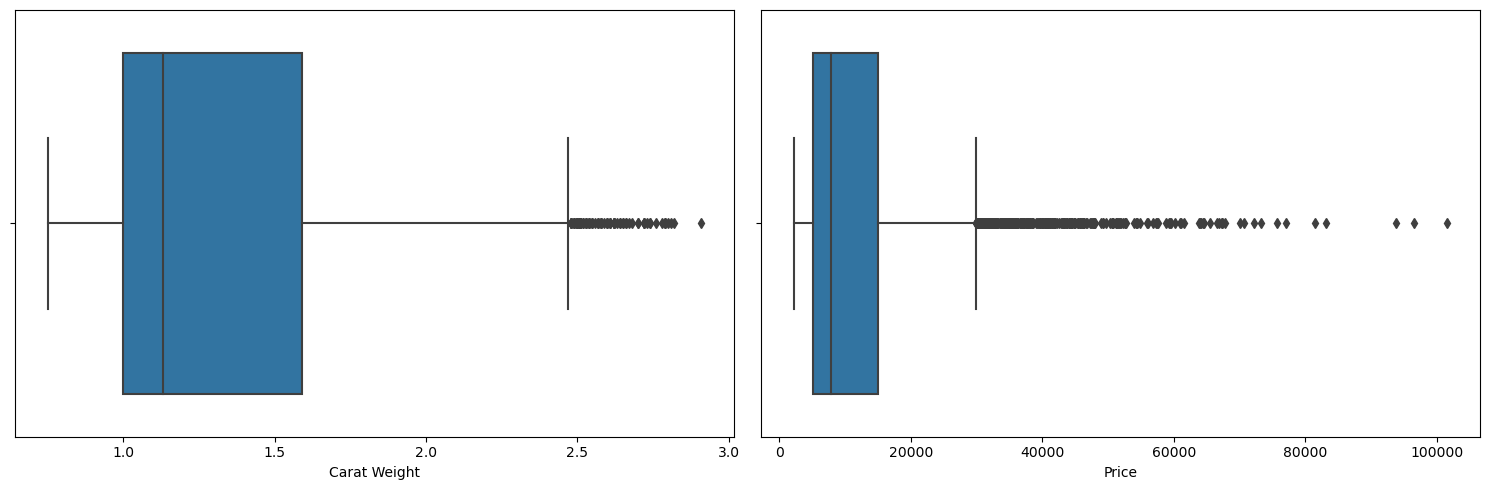

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) 
# Boxplot for Carat Weigth
sns.boxplot(x=df['Carat Weight'], ax=ax[0])  
ax[0].set_xlabel('Carat Weight') 
# Boxplot for Price
sns.boxplot(x=df['Price'], ax=ax[1])  
ax[1].set_xlabel('Price') 
plt.tight_layout()  
plt.show()  

Now we need to remove outliers from the data

In [10]:
# Let's use IQR for this
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Создаем новый DataFrame без выбросов
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]


In [11]:
df_no_outliers.describe()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
count,5621.000000,5621.00000,5621.000000,5621.000000,5621.000000,5621.000000,5621.000000,5621.0,5621.000000
mean,2997.746308,1.27538,3.320406,3.178082,2.280199,3.400640,3.281267,1.0,9879.552571
std,1730.146081,0.42737,0.829821,1.550958,1.322115,0.660227,0.716645,0.0,6633.032451
min,1.000000,0.75000,1.000000,1.000000,1.000000,2.000000,2.000000,1.0,2184.000000
25%,1500.000000,1.00000,3.000000,2.000000,1.000000,3.000000,3.000000,1.0,5019.000000
50%,3002.000000,1.10000,3.000000,3.000000,2.000000,3.000000,3.000000,1.0,7361.000000
75%,4486.000000,1.51000,4.000000,4.000000,3.000000,4.000000,4.000000,1.0,12400.000000
max,5999.000000,2.91000,5.000000,6.000000,6.000000,4.000000,4.000000,1.0,29860.000000


Descriptive Statistic: 
1. Number of brilliants are reduced to 5621
2. Mean of price is 9879
3. Median of price is 7361
4. Max price is 29860

## Feature importance

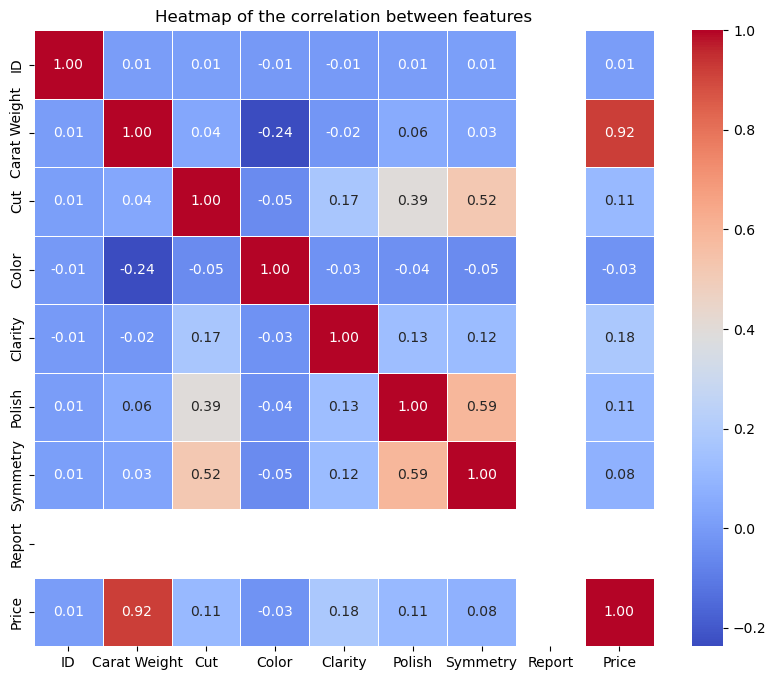

In [12]:
corr_matrix = df_no_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Heatmap of the correlation between features')
plt.show()

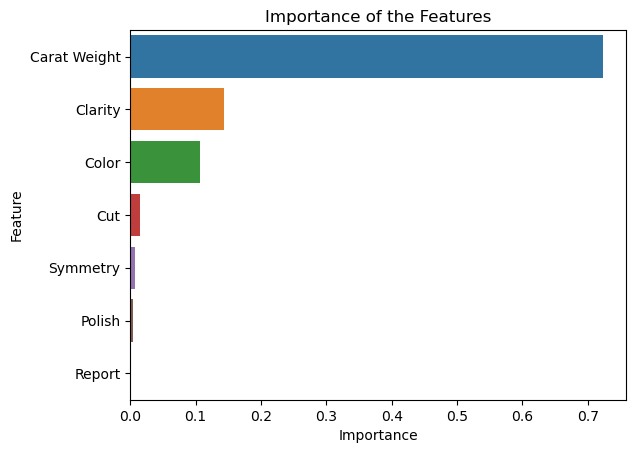

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

X = df_no_outliers.drop(['ID', 'Price'], axis=1)
y = df_no_outliers['Price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = XGBRegressor(eta=0.25, random_state=0)

model.fit(X_train, y_train)
importances = model.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Importance of the Features')
plt.show()

In [19]:
# Model's rate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Determination Coefficient (R^2): {r_squared:.2f}")
print(f"Mean Squared Error (MSE): {mse}")
print(f'Score of the XGBoost model: {model.score(X_test, y_test)}')

Root Mean Squared Error (RMSE): 861.76
Mean Absolute Error (MAE): 483.36
Determination Coefficient (R^2): 0.98
Mean Squared Error (MSE): 742636.8493436349
Score of the XGBoost model: 0.9836440026514083


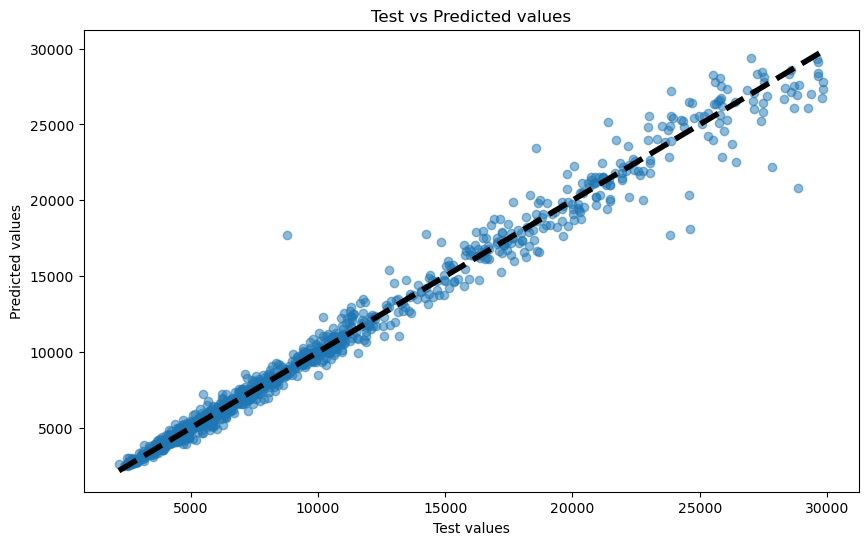

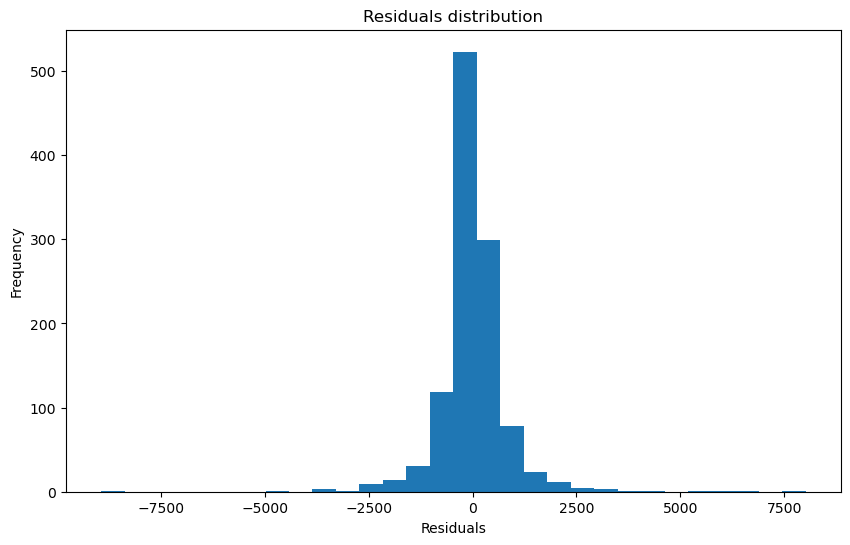

In [15]:
residuals1 = y_test - predictions

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Test values')
plt.ylabel('Predicted values')
plt.title('Test vs Predicted values')
plt.show()

# Гистограмма резидуалов
plt.figure(figsize=(10, 6))
plt.hist(residuals1, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals distribution')
plt.show()


1. Since R^2 coefficient is 0.98, which is really high, this means that our predictors are well designed for this task.
2. Since MAE is only 483.36, which is low in percentage (483/9879 ~ 5%), so predictions are adequate.
3. So for the RMSE as 2nd one, 861/9879 ~ 8%, so predictions are adequate.
4. The last, but not least score of the XGBoost model is more than 98%

In [16]:
df = df_no_outliers.drop(['Report', 'Symmetry', 'Polish'], axis = 1)

In [17]:
df_important = df.copy()
df_important = df_important.drop('ID', axis=1)
df_important

,Carat Weight,Cut,Color,Clarity,Price
0,1.10,4,2,1,5169
1,0.83,4,2,3,3470
2,0.85,4,2,1,3183
3,0.91,4,5,1,4370
4,0.83,4,3,1,3171
...,...,...,...,...,...
5994,0.81,3,6,4,5423
5995,1.03,4,6,1,6250
5996,1.00,3,6,1,5328
5997,1.02,4,6,1,6157


# XGBoost Regressor
---

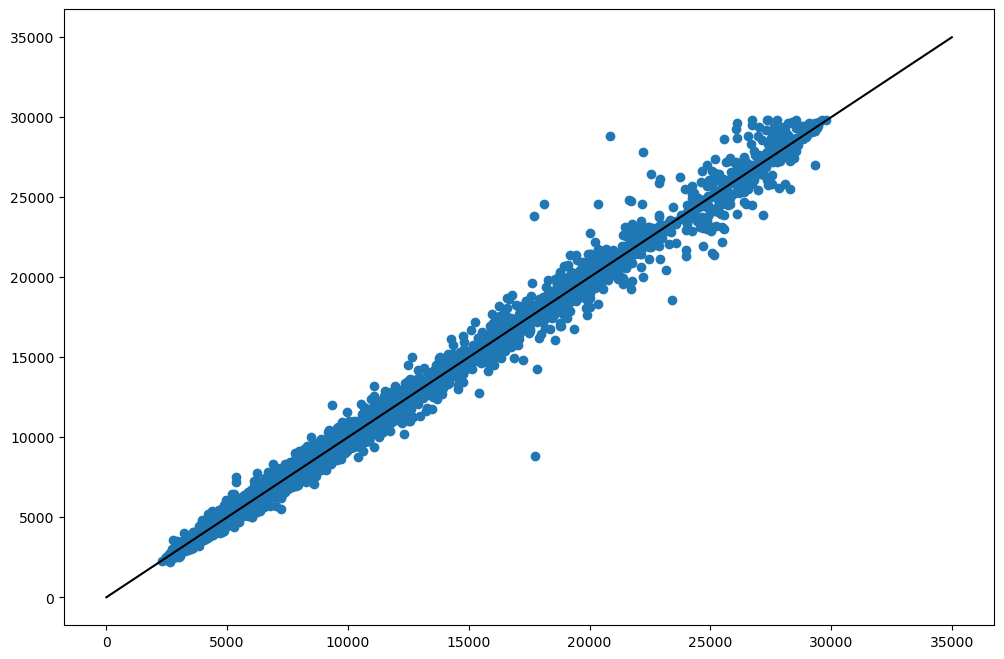

In [24]:
y_pred = model.predict(X)
plt.figure(figsize=(12,8))
plt.scatter(y_pred, y)
plt.plot(range(35000), range(35000), c='black')

In [25]:
y_diff = y - y_pred_xgb
y_diff

0      -180.593750
1      -179.778076
2      -152.745361
3       -81.038574
4        -6.219238
           ...    
5994    240.447754
5995     65.300293
5996   -330.954102
5997     59.639160
5998    114.067383
Name: Price, Length: 5621, dtype: float64

In [28]:
y_result = pd.DataFrame({"Price": y, 'Real Value': y_pred, 'Ratio': y_pred / y, "Diff": y_diff})
y_result[(y_result["Diff"] < -3000)]

,Price,Real Value,Ratio,Diff
742,21524,25069.816406,1.164738,-3545.816406
1641,8803,17741.248047,2.015364,-8938.248047
3722,18575,23428.578125,1.261296,-4853.578125
3765,14236,17813.814453,1.251322,-3577.814453
4181,23864,27173.173828,1.138668,-3309.173828
5506,21409,25163.705078,1.175380,-3754.705078
5637,22206,25471.642578,1.147061,-3265.642578


# Description of Results
---

1. One of the best options to choose is brilliant with ID number 1642 (1641 idx), since it has the most obvious difference between actual price and predicted such that predicted is higher than actual, so it's more valuable than the price it got. Moreover, the ratio predicted/actual is more than 2, which is significant for our observation.
2. Second one is ID number 3723 (3722 idx), since it has the second most difference in the list, and the ratio is second the most.
3. However it will be great to consider ID number 4182 (4181 idx), since it is the most expensive one, and it should look great especially as a brilliant for engagement ring.

# Result
---

In [29]:
df[df["ID"].isin([1642, 3723, 4182])]

,ID,Carat Weight,Cut,Color,Clarity,Price
1641,1642,2.00,3,2,1,8803
3722,3723,2.10,2,2,3,18575
4181,4182,2.27,4,2,4,23864
